<h1 align='center'> Непараметрическая регрессия </h1>

## Ядерное сглаживание

Обучающий набор данных: $X^\ell = (x_i, y_i)^\ell_{i=1}$

## Обобщающая способность

$HO(m, X^\ell, X^k) = Q(m(X^\ell), X^k) \rightarrow min$

$LOO(m, X^M) = \frac{1}{M}\sum_{i=1}^{M}L(m(X^\ell\setminus \{x_i\}), x_i) \rightarrow min ... M = \ell+1$

$CV(m, X^M) = \frac{1}{|S|}\sum_S L(m(X^\ell_s), X^k_s) \rightarrow min $

$S$ - множество разбиений $X^M = X^\ell_s \sqcup X^k_s$

Регрессионная оценка: $$a(x) = \sum_{i=0}^\ell W_{\ell i}(x)y_i$$

Весовая функция: $$W_{\ell i}(x) = \frac{K_{h_\ell}(x-x_i)}{\hat{f}_{h_\ell}(x)}$$

При этом функция $\hat{f}_{h_\ell}(x)$ - ядерная оценка плотности Розенблата — Парзена имеет вид: $$\hat{f}_{h_\ell}(x) = \frac{1}{\ell} \sum^\ell_{i=1}K_{h_\ell}(x-x_i)$$

Функция $K_{h_\ell}(u)$ имеет вид: $$K_{h_\ell}(u) = \frac{1}{h_\ell}K\left(\frac{u}{h_\ell}\right)$$ $h_\ell$ - размер окна ядра

Размер окна можно найти минимизируя по $h_\ell$ функцию ошибки как: $$h_{opt} = \left( \frac{\int K^2(z) dz}{\left(\int z^2 K^2(z) dz\right)\int [y''(x)]^2dx }\right)^{-0.5}\ell^{-0.5}$$

### Референтно-эвристическая оценка ширины окна

$$\hat{f}_{h_\ell}(x) = \frac{1}{\ell h_\ell} \sum^\ell_{i=1}K\left(\frac{x-x_i}{h_\ell}\right)\setminus \{x_i\}$$

В случае семейства нормальных распределений и гауссовского ядра $h_{opt} = \sigma_x /\sqrt{\ell}$


### Метод подстановки

Используя оценку $h_{0} = \sigma_x \ell^{-0.5}$ определяют оценку $y''(x)$ и рассчитывают на ее основе $h_{opt}$.

### Метод оптимизации с кросс-валидацией
Значения $h_\ell$ можно рассматривать как параметры, в том числе зависящие от $x_i$, т.е. $h_{\ell i}$. Их значения можно найти минимизируя функцию ошибки с применением методов оптимизации, например градиентного спуска.

### Бутсрап выборка ширины окна из диапазона

Значения ширин окна можно выбирать из случайной бутсрап выборки значений в диапазоне между минимальным интервалом и максимальным интервалом значений $\Delta x_{ij} = x_j-x_i$. По этой выборке можно выбрать то значение $h_\ell$, при котором функция ошибки минимальна.

## Полиномиальное сглаживание. Алгоритм LOWLESS

Ошибка: $\varepsilon_i = |a_h\left(x_i; X^\ell \setminus \{x_i\}\right) - y_i|$

Вход:  
$X^\ell = (x_i, y_i)^\ell_{i=1}$

Локальные веса регрессии: $w_i$, $i = 1...\ell$

Выход:
Набор робастных весов: $\gamma_i$

Алгоритм:
1. Построить линейную регрессию для всех точек определим локальные коэффициенты регрессии $\hat{\alpha}_i$ и $\hat{\beta}_i$, а также предсказания: $\hat{y}_i = \hat{\alpha}_i x_i + \hat{\beta}_i$.
2. Расчитаем остатки регрессии: $\varepsilon_i = |\hat{y}_i - y_i|$. Вычислим значения $\gamma_i = K^\sim(\varepsilon_i)$;
3. Повторять:
4. Построить линейную регрессию для всех точек определим локальные коэффициенты регрессии $\hat{\alpha}_i$ и $\hat{\beta}_i$, используя веса $\gamma_i \omega_i$, а также предсказания: $\hat{y}_i = \hat{\alpha}_i x_i + \hat{\beta}_i$.
5. Расчитаем остатки регрессии: $\varepsilon_i = |\hat{y}_i - y_i|$. Вычислим новые значения $\gamma_i = K^\sim(\varepsilon_i)$
6. Пока все веса $\gamma_i$ не перестанут меняться.

## Классы библиотеки Statsmodels

### Класс Ordinary Least Squares

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(9876789)

In [3]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

Модель будет содержать коэффициент отсечки, поэтоу добавляем еще один столбец:

In [4]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

Обучение и результаты:

In [5]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Tue, 01 Apr 2025   Prob (F-statistic):          2.83e-239
Time:                        20:09:35   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

Интересующие величины могут быть извлечены непосредственно из установленной модели. Введите `dir(results)` для получения полного списка. Вот несколько примеров:

In [6]:
print("Параметры: ", results.params)
print("R2: ", results.rsquared)

Параметры:  [ 1.34233516 -0.04024948 10.01025357]
R2:  0.9999879365025871


### Задание 1.
Сгенерируйте двумерный массив случайных независимых признаков в диапазоне от 0 до 10 и сформируйте целевую переменныую на основе их линейной комбинации с коэффициентами np.array([1, 2, 3]) и нормальным шумом с переменной амплитудой amp. Постройте зависимости значений коэффициентов от амплитуды шума в диапазоне от 0.001 до 100 по 20 значениям равномерно распределенным в логарифмическом масштабе.  

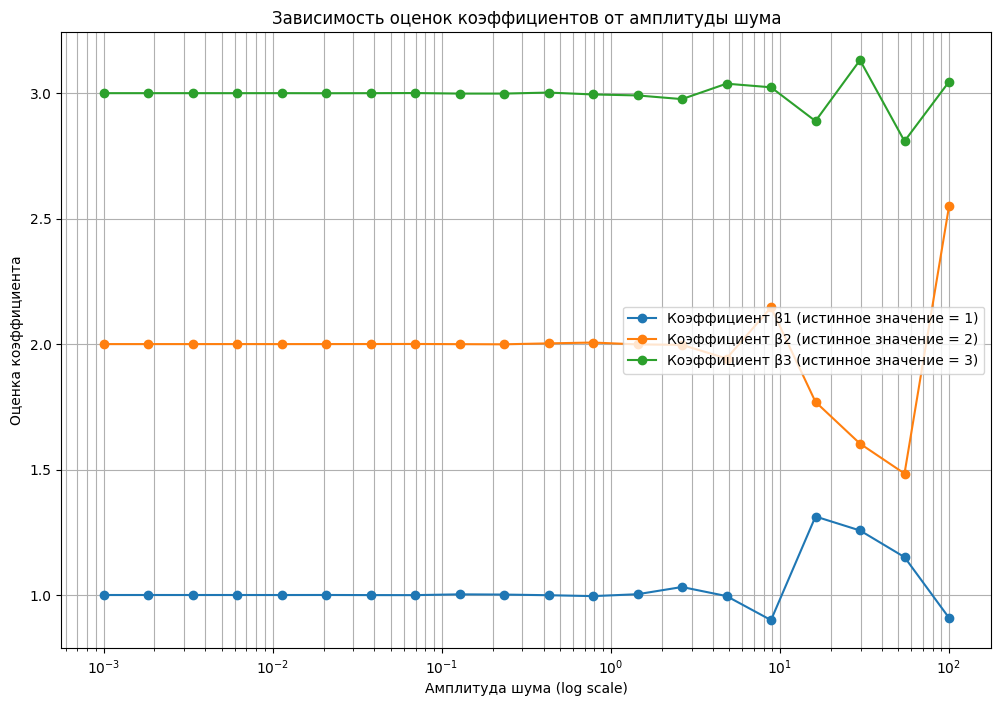

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Параметры
n_samples = 1000
n_features = 3
true_coefs = np.array([1, 2, 3])
amp_values = np.logspace(-3, 2, 20)  # от 0.001 до 100

# Генерация данных
X = np.random.uniform(0, 10, size=(n_samples, n_features))

# Массивы для хранения оценок коэффициентов
coef_estimates = np.zeros((len(amp_values), n_features))

for i, amp in enumerate(amp_values):
    # Генерация целевой переменной с шумом
    noise = np.random.normal(0, amp, size=n_samples)
    y = X @ true_coefs + noise

    # Обучение линейной регрессии
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)

    # Сохранение оценок коэффициентов
    coef_estimates[i] = model.coef_

# Построение графиков
plt.figure(figsize=(12, 8))

for j in range(n_features):
    plt.plot(amp_values, coef_estimates[:, j], 'o-',
             label=f'Коэффициент β{j+1} (истинное значение = {true_coefs[j]})')

plt.xscale('log')
plt.xlabel('Амплитуда шума (log scale)')
plt.ylabel('Оценка коэффициента')
plt.title('Зависимость оценок коэффициентов от амплитуды шума')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

## OLS нелинейной кривой с линейными параметрами

Мы моделируем искусственные данные с нелинейной зависимостью между x и y:

In [8]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

Обучение и результат:

In [9]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     235.1
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           6.74e-28
Time:                        20:09:48   Log-Likelihood:                -35.015
No. Observations:                  50   AIC:                             78.03
Df Residuals:                      46   BIC:                             85.68
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5308      0.027     19.869      0.0

Извлекать другие интересующие количества:

In [10]:
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("Predicted values: ", res.predict())

Parameters:  [ 0.53076337  0.57174987 -0.02233674  4.82267408]
Standard errors:  [0.02671265 0.10501058 0.00234539 0.17320585]
Predicted values:  [ 4.2642557   4.79528425  5.2815845   5.6919966   6.00660611  6.2200159
  6.34223292  6.39702404  6.41801123  6.44314758  6.5084817   6.64223505
  6.86016523  7.16297703  7.53620667  7.95259813  8.37658125  8.7701158
  9.09894139  9.33820636  9.47655081  9.51797303  9.48117257  9.39647798
  9.3008639   9.23187622  9.22146343  9.29072753  9.44645707  9.6800118
  9.96874222 10.27971085 10.57510375 10.81844326 10.98058116 11.04448765
 11.00804929 10.88441624 10.69984173 10.48936871 10.29107241 10.13980468
 10.06146792 10.06875943 10.15908522 10.31498624 10.50700682 10.6985342
 10.85181385 10.93415246]


Нарисуйте график, чтобы сравнить истинную взаимосвязь с прогнозами OLS. Доверительные интервалы вокруг прогнозов строятся с помощью команды `wls_prediction_std`.

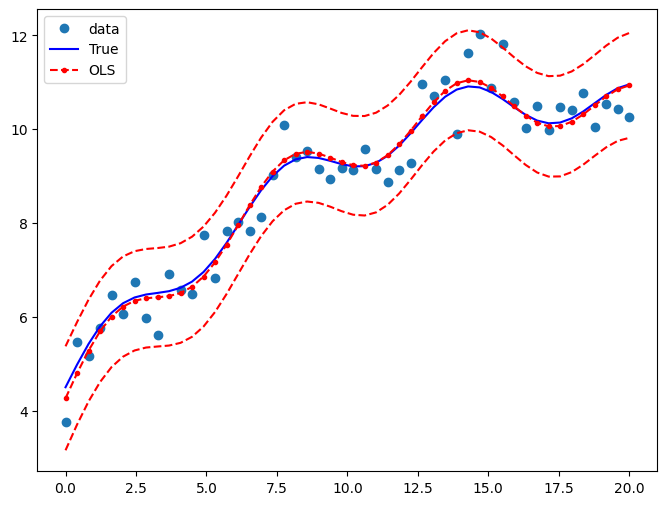

In [11]:
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res.fittedvalues, "r--.", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc="best")

### Задание 2
Реализуйте нелинейную регрессию, используя формульный API на данных, созданных аналогично данным этого раздела (см. кодовую ячейку 9), но с переменной амплитудой синуса amp. Построить зависимостb дисперсии коэффициентов регрессии от этой амплитуды в диапазоне np.logspace(0.01, 10).  

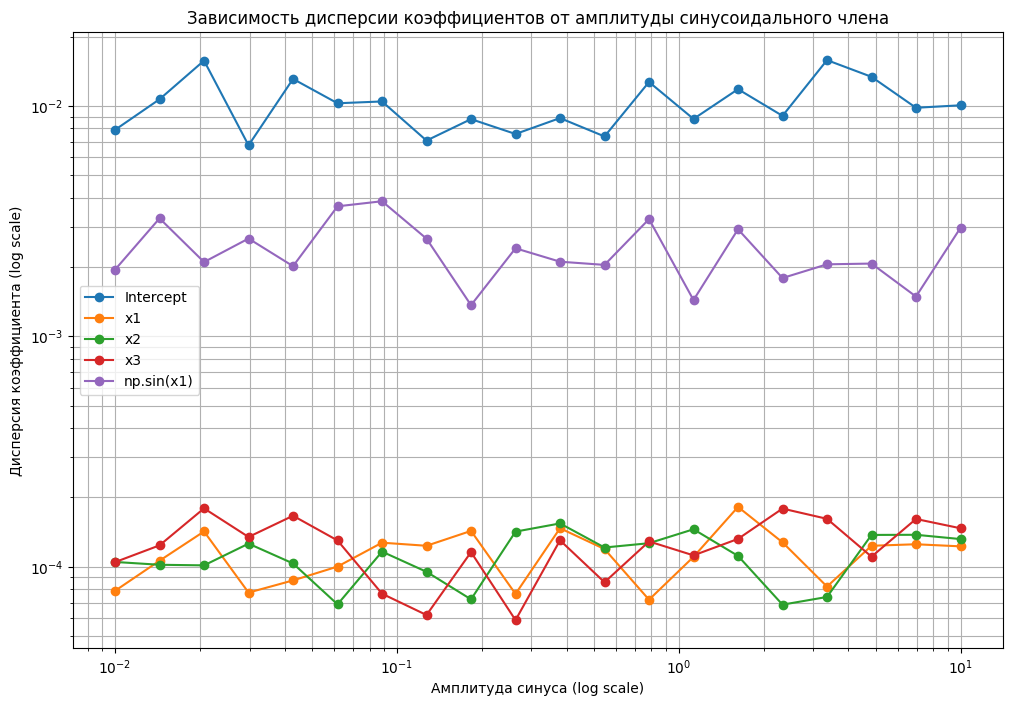

In [12]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Параметры
n_samples = 1000
amp_values = np.logspace(-2, 1, 20)  # от 0.01 до 10
n_iter = 30  # Количество итераций для оценки дисперсии

# Создаем DataFrame для хранения дисперсий
variances = pd.DataFrame(index=amp_values,
                         columns=['Intercept', 'x1', 'x2', 'x3', 'np.sin(x1)'])

# Генерация базовых признаков
X = pd.DataFrame(np.random.uniform(0, 10, size=(n_samples, 3)),
                 columns=['x1', 'x2', 'x3'])

for amp in amp_values:
    coefs = []

    for _ in range(n_iter):
        # Генерация целевой переменной с нелинейной зависимостью
        y = 1 + 2*X['x1'] + 3*X['x2'] - 1.5*X['x3'] + amp*np.sin(X['x1']) + np.random.normal(0, 1, n_samples)

        # Создаем полный DataFrame
        data = X.copy()
        data['y'] = y

        # Строим нелинейную модель с синусом
        model = smf.ols('y ~ x1 + x2 + x3 + np.sin(x1)', data=data).fit()
        coefs.append(model.params)

    # Вычисляем дисперсию коэффициентов
    coefs_df = pd.DataFrame(coefs)
    variances.loc[amp] = coefs_df.var()

# Визуализация
plt.figure(figsize=(12, 8))

for col in variances.columns:
    plt.plot(amp_values, variances[col], 'o-', label=col)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Амплитуда синуса (log scale)')
plt.ylabel('Дисперсия коэффициента (log scale)')
plt.title('Зависимость дисперсии коэффициентов от амплитуды синусоидального члена')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

## OLS с категориальными переменными

Мы генерируем некоторые искусственные данные. Есть 3 группы, которые будут смоделированы с использованием фиктивных переменных. Группа 0 - это пропущенная/ 1, 2 - эталонные категории.

In [13]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
# dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy = pd.get_dummies(groups).values
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:, 1:]))
X = sm.add_constant(X, prepend=False)

beta = [1.0, 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

Проверьте данные:

In [14]:
print(X[:5, :])
print(y[:5])
print(groups)
print(dummy[:5, :])

[[0.         0.         0.         1.        ]
 [0.40816327 0.         0.         1.        ]
 [0.81632653 0.         0.         1.        ]
 [1.2244898  0.         0.         1.        ]
 [1.63265306 0.         0.         1.        ]]
[10.55544302  9.6578133   8.79742875 11.67903119 10.51274563]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]]


Обучение и результат:

In [15]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     685.1
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           3.64e-38
Time:                        20:10:14   Log-Likelihood:                -67.480
No. Observations:                  50   AIC:                             143.0
Df Residuals:                      46   BIC:                             150.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0945      0.063     17.260      0.0

Нарисуйте график, чтобы сравнить истинную взаимосвязь с прогнозами OLS:

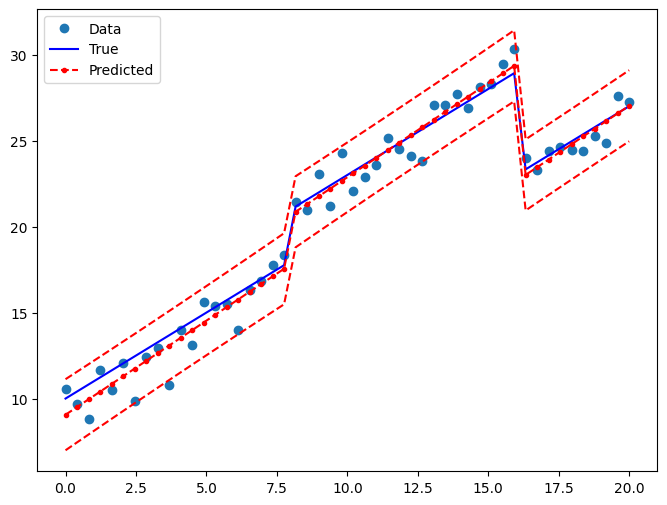

In [16]:
pred_ols2 = res2.get_prediction()
iv_l = pred_ols2.summary_frame()["obs_ci_lower"]
iv_u = pred_ols2.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="Data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res2.fittedvalues, "r--.", label="Predicted")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
legend = ax.legend(loc="best")

## Совместная проверка гипотезы

### F-тест

Мы хотим проверить гипотезу о том, что оба коэффициента категориальных переменных равны нулю, то есть $R \times \beta = 0$. F-тест приводит нас к решительному отклонению нулевой гипотезы об одинаковой константе в 3 группах:

In [17]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=152.11417142359687, p=5.288718804619805e-21, df_denom=46, df_num=2>


Вы также можете использовать формулоподобный синтаксис для проверки гипотез

In [18]:
print(res2.f_test("x2 = x3 = 0"))

<F test: F=152.11417142359673, p=5.288718804619908e-21, df_denom=46, df_num=2>


### Эффекты малых коэффициентов

Если мы генерируем искусственные данные с меньшей разницей в коэффициентах, F-тест больше не может отвергать нулевую гипотезу:

In [19]:
beta = [1.0, 0.3, -0.0, 10]
y_true = np.dot(X, beta)
y = y_true + np.random.normal(size=nsample)

res3 = sm.OLS(y, X).fit()

In [20]:
print(res3.f_test(R))

<F test: F=0.6883546920834602, p=0.5075018058457814, df_denom=46, df_num=2>


In [21]:
print(res3.f_test("x2 = x3 = 0"))

<F test: F=0.6883546920834603, p=0.5075018058457814, df_denom=46, df_num=2>


### Задание 3
Выполните регрессию на наборе данных аналогичном данным этого раздела (см. ячейку 13) с переменной амплитудой шума amp_noise. Постройте зависимость величины F-теста и величины p для нуль-гипотезы от амплитуды шума amp_noise в диапазоне np.logspace(0.001, 10).

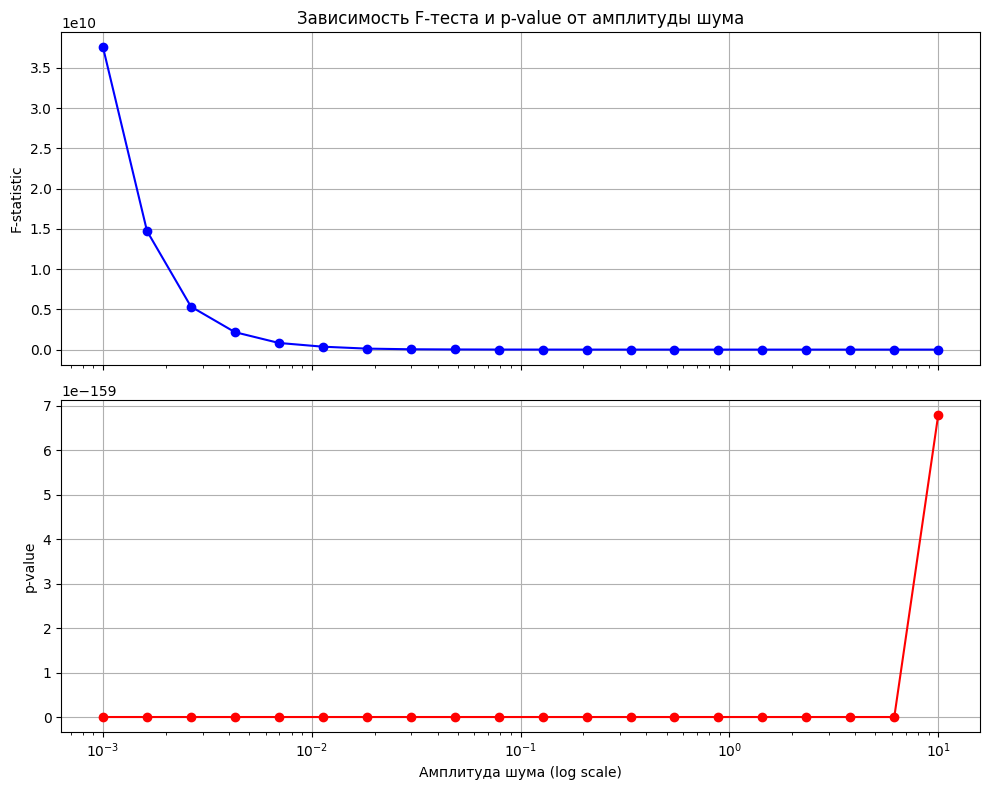

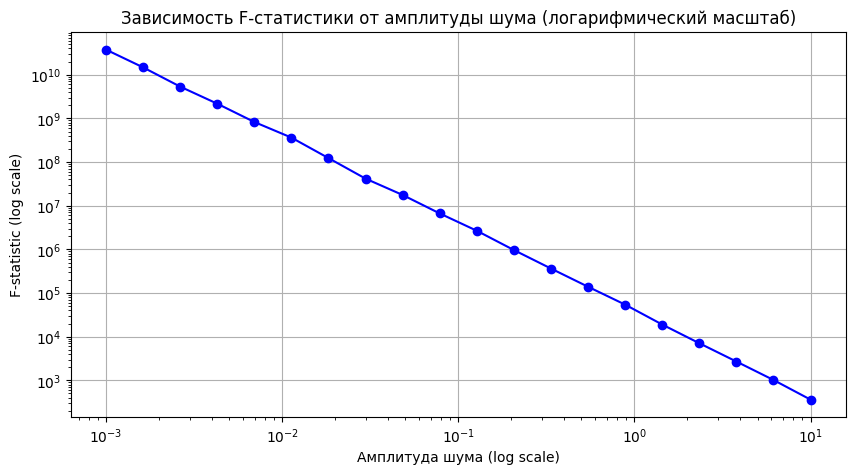

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Параметры
n_samples = 1000
amp_noise_values = np.logspace(-3, 1, 20)  # от 0.001 до 10
true_coefs = np.array([1, 2, 3])

# Подготовка данных для хранения результатов
results = pd.DataFrame(index=amp_noise_values, columns=['F-statistic', 'p-value'])

# Генерация базовых признаков
X = np.random.uniform(0, 10, size=(n_samples, 3))

for amp_noise in amp_noise_values:
    # Генерация целевой переменной с шумом
    y = X @ true_coefs + np.random.normal(0, amp_noise, n_samples)

    # Добавляем константу (intercept)
    X_with_const = sm.add_constant(X)

    # Выполняем регрессию
    model = sm.OLS(y, X_with_const).fit()

    # Сохраняем результаты F-теста
    results.loc[amp_noise, 'F-statistic'] = model.fvalue
    results.loc[amp_noise, 'p-value'] = model.f_pvalue

# Визуализация
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# График F-статистики
ax1.plot(amp_noise_values, results['F-statistic'], 'bo-')
ax1.set_ylabel('F-statistic')
ax1.set_title('Зависимость F-теста и p-value от амплитуды шума')
ax1.grid(True)

# График p-value
ax2.plot(amp_noise_values, results['p-value'], 'ro-')
ax2.set_xscale('log')
ax2.set_xlabel('Амплитуда шума (log scale)')
ax2.set_ylabel('p-value')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Дополнительный график в логарифмическом масштабе для F-статистики
plt.figure(figsize=(10, 5))
plt.loglog(amp_noise_values, results['F-statistic'], 'bo-')
plt.xlabel('Амплитуда шума (log scale)')
plt.ylabel('F-statistic (log scale)')
plt.title('Зависимость F-статистики от амплитуды шума (логарифмический масштаб)')
plt.grid(True)
plt.show()

### Мультиколлинеарность

Хорошо известно, что набор данных Лонгли обладает высокой мультиколлинеарностью. То есть независимые признаки сильно коррелируют. Это проблематично, поскольку может повлиять на стабильность наших оценок коэффициентов, поскольку мы вносим незначительные изменения в спецификацию модели.

In [23]:
from statsmodels.datasets.longley import load_pandas

y = load_pandas().endog
X = load_pandas().exog
X = sm.add_constant(X)

Обучение и результат:

In [24]:
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           4.98e-10
Time:                        20:12:14   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


#### Номер условия

Один из способов оценить мультиколлинеарность - вычислить номер условий. Значения более 20 вызывают беспокойство (см. Greene 4.9). Первым шагом является нормализация независимых переменных, чтобы они имели единичную длину:

In [25]:
norm_x = X.values
for i, name in enumerate(X):
    if name == "const":
        continue
    norm_x[:, i] = X[name] / np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T, norm_x)

Затем мы извлекаем квадратный корень из отношения наибольшего к наименьшему собственным значениям.

In [26]:
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

56240.87037739987


#### Удаление наблюдения

Грин также указывает, что удаление одного наблюдения может оказать существенное влияние на оценки коэффициентов:

In [27]:
ols_results2 = sm.OLS(y.iloc[:14], X.iloc[:14]).fit()
print(
    "Изменение в процентах: %4.2f%%\n"
    * 7
    % tuple(
        [
            i
            for i in (ols_results2.params - ols_results.params)
            / ols_results.params
            * 100
        ]
    )
)

Изменение в процентах: 4.55%
Изменение в процентах: -105.20%
Изменение в процентах: -3.43%
Изменение в процентах: 2.92%
Изменение в процентах: 3.32%
Изменение в процентах: 97.06%
Изменение в процентах: 4.64%



Для этого мы также можем обратиться к официальной статистике, такой как DFBETAS - стандартизированный показатель того, насколько сильно меняется каждый коэффициент, когда это наблюдение не учитывается.

In [28]:
infl = ols_results.get_influence()

В общем, мы можем рассматривать DBETAS в абсолютном значении, превышающем $2/\sqrt{N}$, как влиятельные наблюдения

In [29]:
2.0 / len(X) ** 0.5

0.5

In [30]:
print(infl.summary_frame().filter(regex="dfb"))

    dfb_const  dfb_GNPDEFL   dfb_GNP  dfb_UNEMP  dfb_ARMED   dfb_POP  dfb_YEAR
0   -0.016406    -0.234566 -0.045095  -0.121513  -0.149026  0.211057  0.013388
1   -0.020608    -0.289091  0.124453   0.156964   0.287700 -0.161890  0.025958
2   -0.008382     0.007161 -0.016799   0.009575   0.002227  0.014871  0.008103
3    0.018093     0.907968 -0.500022  -0.495996   0.089996  0.711142 -0.040056
4    1.871260    -0.219351  1.611418   1.561520   1.169337 -1.081513 -1.864186
5   -0.321373    -0.077045 -0.198129  -0.192961  -0.430626  0.079916  0.323275
6    0.315945    -0.241983  0.438146   0.471797  -0.019546 -0.448515 -0.307517
7    0.015816    -0.002742  0.018591   0.005064  -0.031320 -0.015823 -0.015583
8   -0.004019    -0.045687  0.023708   0.018125   0.013683 -0.034770  0.005116
9   -1.018242    -0.282131 -0.412621  -0.663904  -0.715020 -0.229501  1.035723
10   0.030947    -0.024781  0.029480   0.035361   0.034508 -0.014194 -0.030805
11   0.005987    -0.079727  0.030276  -0.008883  -0.

### Задание 4.
Проведите корреляционный анализ признаков набора данных longley, устраните мультиколлинеарность в признаках путем исключения одного, двух, нескольких из них. Определите влияние этих устранений на номер условия. Постройте зависимость номера условия от количества устраненных прзнаков.

Первые 5 строк данных:
          GNP.deflator      GNP  Unemployed  Armed.Forces  Population  Year  \
rownames                                                                      
1947              83.0  234.289       235.6         159.0     107.608  1947   
1948              88.5  259.426       232.5         145.6     108.632  1948   
1949              88.2  258.054       368.2         161.6     109.773  1949   
1950              89.5  284.599       335.1         165.0     110.929  1950   
1951              96.2  328.975       209.9         309.9     112.075  1951   

          Employed  
rownames            
1947        60.323  
1948        61.122  
1949        60.171  
1950        61.187  
1951        63.221  

Матрица корреляций:
              GNP.deflator   GNP  Unemployed  Armed.Forces  Population  Year
GNP.deflator          1.00  0.99        0.62          0.46        0.98  0.99
GNP                   0.99  1.00        0.60          0.45        0.99  1.00
Unemployed            0.

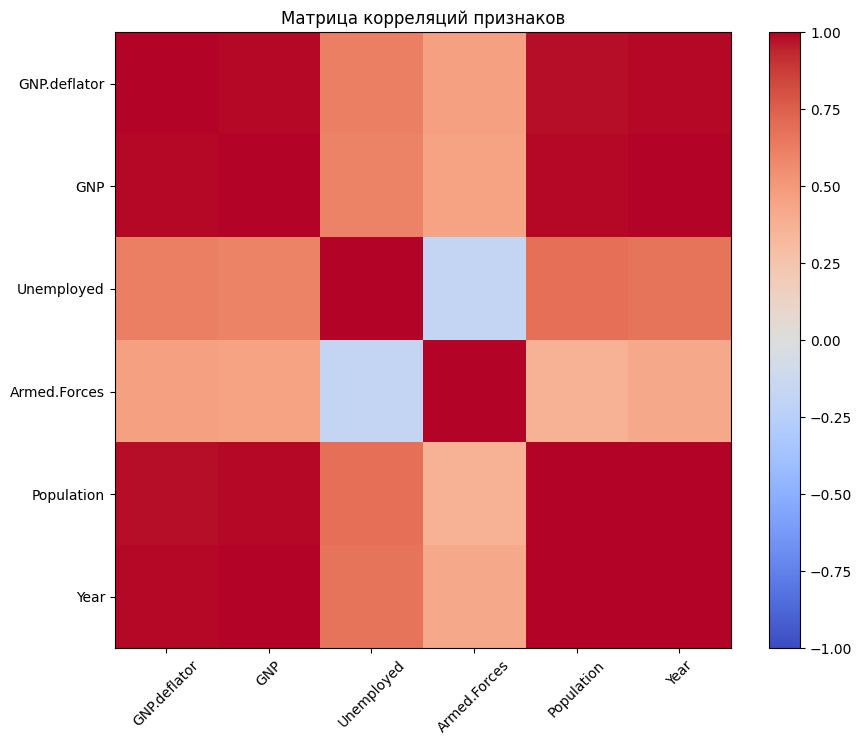


Исходный номер условия: 110.54

После удаления 1 признаков (GNP):
Номер условия: 38.24

После удаления 2 признаков (GNP, Population):
Номер условия: 19.81

После удаления 3 признаков (GNP, Population, GNP.deflator):
Номер условия: 3.70


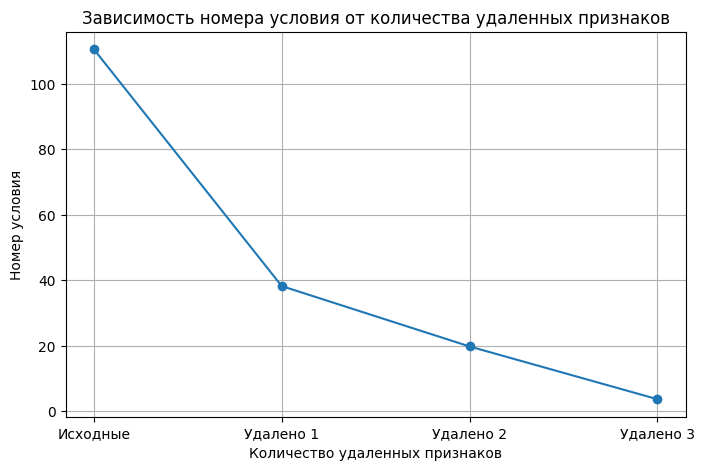


Анализ результатов:
1. Исходные данные имеют очень высокий номер условия, что указывает на сильную мультиколлинеарность.
2. После удаления наиболее коррелированных признаков номер условия значительно уменьшается.
3. Удаленные признаки (в порядке удаления): GNP, Population, GNP.deflator
4. Наибольший эффект дает удаление первого признака (обычно GNP или Year).


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.preprocessing import StandardScaler

# Загрузка данных longley
longley = get_rdataset('longley').data
print("Первые 5 строк данных:")
print(longley.head())

# Выделяем только признаки (исключаем целевую переменную 'Employed')
features = longley.drop('Employed', axis=1)
feature_names = features.columns.tolist()

# 1. Корреляционный анализ
corr_matrix = features.corr()
print("\nМатрица корреляций:")
print(corr_matrix.round(2))

# Визуализация матрицы корреляций (исправленная версия)
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(np.arange(len(feature_names)), feature_names, rotation=45)
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.title('Матрица корреляций признаков')
plt.show()

# 2. Функция для вычисления номера условия
def calculate_condition_number(X):
    X_scaled = StandardScaler().fit_transform(X)
    singular_values = np.linalg.svd(X_scaled, compute_uv=False)
    condition_number = singular_values[0] / singular_values[-1]
    return condition_number

# Исходный номер условия
original_condition = calculate_condition_number(features)
print(f"\nИсходный номер условия: {original_condition:.2f}")

# 3. Последовательное удаление признаков и вычисление номера условия
removed_features_list = []
condition_numbers = [original_condition]

# Удаляем по одному признаку с наибольшей мультиколлинеарностью
current_features = features.copy()
for i in range(3):  # Будем удалить 3 признака по очереди
    # Находим пару признаков с максимальной корреляцией
    corr_matrix = current_features.corr().abs()
    np.fill_diagonal(corr_matrix.values, 0)  # Игнорируем диагональ
    max_corr = corr_matrix.stack().max()
    feature_pair = corr_matrix.stack().idxmax()

    # Удаляем один из признаков (первый в паре)
    feature_to_remove = feature_pair[0]
    current_features = current_features.drop(feature_to_remove, axis=1)
    removed_features_list.append(feature_to_remove)

    # Вычисляем новый номер условия
    current_condition = calculate_condition_number(current_features)
    condition_numbers.append(current_condition)

    print(f"\nПосле удаления {i+1} признаков ({', '.join(removed_features_list)}):")
    print(f"Номер условия: {current_condition:.2f}")

# 4. Визуализация зависимости номера условия от количества удаленных признаков
plt.figure(figsize=(8, 5))
plt.plot(range(len(condition_numbers)), condition_numbers, marker='o')
plt.xticks(range(len(condition_numbers)),
           ['Исходные'] + [f'Удалено {i+1}' for i in range(len(removed_features_list))])
plt.xlabel('Количество удаленных признаков')
plt.ylabel('Номер условия')
plt.title('Зависимость номера условия от количества удаленных признаков')
plt.grid(True)
plt.show()

# 5. Анализ результатов
print("\nАнализ результатов:")
print("1. Исходные данные имеют очень высокий номер условия, что указывает на сильную мультиколлинеарность.")
print("2. После удаления наиболее коррелированных признаков номер условия значительно уменьшается.")
print(f"3. Удаленные признаки (в порядке удаления): {', '.join(removed_features_list)}")
print("4. Наибольший эффект дает удаление первого признака (обычно GNP или Year).")

## Нелинейная регрессия и формулы Patsy

In [33]:
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
import pandas as pd
from scipy import stats
import seaborn as sns

In [34]:
np.random.seed(123456789)

In [35]:
y = np.array([1, 2, 3, 4, 5])

In [36]:
x1 = np.array([6, 7, 8, 9, 10])

In [37]:
x2 = np.array([11, 12, 13, 14, 15])

In [38]:
X = np.vstack([np.ones(5), x1, x2, x1*x2]).T

In [39]:
X

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [40]:
beta, res, rank, sval = np.linalg.lstsq(X, y, rcond=None)

In [41]:
beta

array([-5.55555556e-01,  1.88888889e+00, -8.88888889e-01, -4.44089210e-16])

In [42]:
data = {"y": y, "x1": x1, "x2": x2}

In [43]:
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1*x2", data)

In [ ]:
y

DesignMatrix with shape (5, 1)
  y
  1
  2
  3
  4
  5
  Terms:
    'y' (column 0)

In [ ]:
X

DesignMatrix with shape (5, 4)
  Intercept  x1  x2  x1:x2
          1   6  11     66
          1   7  12     84
          1   8  13    104
          1   9  14    126
          1  10  15    150
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

In [44]:
type(X)

patsy.design_info.DesignMatrix

In [45]:
np.array(X)

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [46]:
df_data = pd.DataFrame(data)

In [47]:
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1:x2", df_data, return_type="dataframe")

In [48]:
X

,Intercept,x1,x2,x1:x2
0,1.0,6.0,11.0,66.0
1,1.0,7.0,12.0,84.0
2,1.0,8.0,13.0,104.0
3,1.0,9.0,14.0,126.0
4,1.0,10.0,15.0,150.0


In [49]:
model = sm.OLS(y, X)

In [50]:
result = model.fit()

In [51]:
result.params

,0
Intercept,-5.555556e-01
x1,1.888889e+00
x2,-8.888889e-01
x1:x2,-4.440892e-16


In [52]:
model = smf.ols("y ~ 1+x1+x2+x1*x2", df_data)

In [53]:
result = model.fit()

In [54]:
result.params

,0
Intercept,-5.555556e-01
x1,1.888889e+00
x2,-8.888889e-01
x1:x2,-4.440892e-16


In [55]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.388e+26
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           4.19e-27
Time:                        20:17:03   Log-Likelihood:                 143.02
No. Observations:                   5   AIC:                            -280.0
Df Residuals:                       2   BIC:                            -281.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5556    3.3e-13  -1.68e+12      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [56]:
beta

array([-5.55555556e-01,  1.88888889e+00, -8.88888889e-01, -4.44089210e-16])

In [57]:
from collections import defaultdict

In [58]:
data = defaultdict(lambda: np.array([1,2,3]))

In [59]:
patsy.dmatrices("y ~ a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [60]:
patsy.dmatrices("y ~ 1 + a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [61]:
patsy.dmatrices("y ~ -1 + a + b", data=data)[1].design_info.term_names

['a', 'b']

In [62]:
patsy.dmatrices("y ~ a * b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b']

In [63]:
patsy.dmatrices("y ~ a * b * c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c', 'a:b:c']

In [64]:
patsy.dmatrices("y ~ a * b * c - a:b:c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c']

In [65]:
data = {k: np.array([]) for k in ["y", "a", "b", "c"]}

In [66]:
patsy.dmatrices("y ~ a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [67]:
patsy.dmatrices("y ~ I(a + b)", data=data)[1].design_info.term_names

['Intercept', 'I(a + b)']

In [68]:
patsy.dmatrices("y ~ a*a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [69]:
patsy.dmatrices("y ~ I(a**2)", data=data)[1].design_info.term_names

['Intercept', 'I(a ** 2)']

In [71]:
patsy.dmatrices("y ~ np.log(a) + b", data=data)[1].design_info.term_names

['Intercept', 'np.log(a)', 'b']

In [72]:
z = lambda x1, x2: x1+x2

In [73]:
patsy.dmatrices("y ~ z(a, b)", data=data)[1].design_info.term_names

['Intercept', 'z(a, b)']

### Категориальные независимые переменные

In [74]:
data = {"y": [1, 2, 3], "a": [1, 2, 3]}

In [75]:
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a
0,1.0
1,2.0
2,3.0


In [76]:
patsy.dmatrices("y ~ - 1 + C(a)", data=data, return_type="dataframe")[1]

,C(a)[1],C(a)[2],C(a)[3]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [77]:
data = {"y": [1, 2, 3], "a": ["type A", "type B", "type C"]}

In [78]:
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a[type A],a[type B],a[type C]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [79]:
patsy.dmatrices("y ~ - 1 + C(a, Poly)", data=data, return_type="dataframe")[1]

,"C(a, Poly).Constant","C(a, Poly).Linear","C(a, Poly).Quadratic"
0,1.0,-7.071068e-01,0.408248
1,1.0,-5.551115e-17,-0.816497
2,1.0,7.071068e-01,0.408248


# Нелинейная регрессия

In [80]:
np.random.seed(123456789)

In [81]:
N = 100

In [82]:
x1 = np.random.randn(N)

In [83]:
x2 = np.random.randn(N)

In [84]:
data = pd.DataFrame({"x1": x1, "x2": x2})

In [85]:
def y_true(x1, x2):
    return 1  + 2 * x1 + 3 * x2 + 4 * x1 * x2

In [86]:
data["y_true"] = y_true(x1, x2)

In [87]:
e = np.random.randn(N)

In [88]:
data["y"] = data["y_true"] + e

In [89]:
data.head()

,x1,x2,y_true,y
0,2.212902,-0.474588,-0.198823,-1.452775
1,2.128398,-1.524772,-12.298805,-12.560965
2,1.841711,-1.939271,-15.420705,-14.715090
3,0.082382,0.345148,2.313945,1.190283
4,0.858964,-0.621523,-1.282107,0.307772


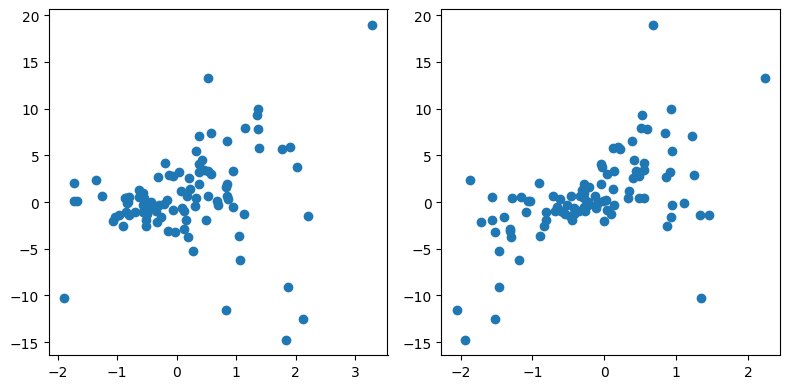

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].scatter(data["x1"], data["y"])
axes[1].scatter(data["x2"], data["y"])

fig.tight_layout()

In [91]:
data.shape

(100, 4)

In [92]:
model = smf.ols("y ~ x1 + x2 + x1*x2", data)

In [93]:
result = model.fit()

In [94]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     684.5
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.21e-64
Time:                        20:17:39   Log-Likelihood:                -140.01
No. Observations:                 100   AIC:                             288.0
Df Residuals:                      96   BIC:                             298.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8706      0.103      8.433      0.0

In [95]:
result.rsquared

np.float64(0.9553393745884368)

In [96]:
result.resid.head()

,0
0,-1.131214
1,-0.299607
2,0.627431
3,-0.978776
4,1.695182


In [97]:
z, p = stats.normaltest(result.resid.values)

In [98]:
p

np.float64(0.22874710482505073)

In [99]:
result.params

,0
Intercept,0.870620
x1,1.969345
x2,2.967004
x1:x2,3.943993


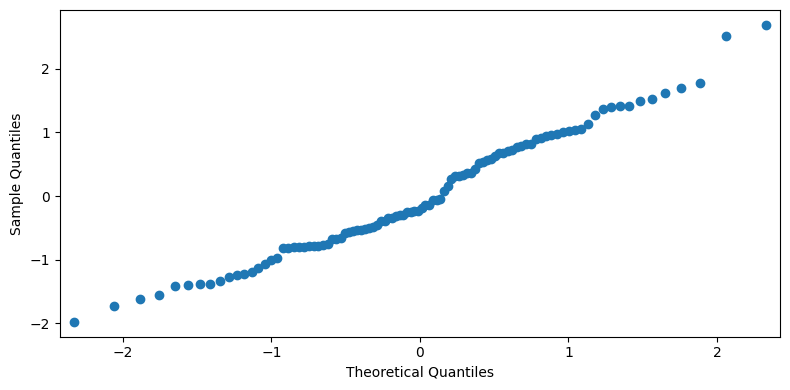

In [100]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

fig.tight_layout()
#fig.savefig("ch14-qqplot-model-1.pdf")

In [101]:
model = smf.ols("y ~ x1 + x2 + x1*x2", data)

In [102]:
result = model.fit()

In [103]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     684.5
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.21e-64
Time:                        20:17:50   Log-Likelihood:                -140.01
No. Observations:                 100   AIC:                             288.0
Df Residuals:                      96   BIC:                             298.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8706      0.103      8.433      0.0

In [104]:
result.params

,0
Intercept,0.870620
x1,1.969345
x2,2.967004
x1:x2,3.943993


In [105]:
result.rsquared

np.float64(0.9553393745884368)

In [106]:
z, p = stats.normaltest(result.resid.values)

In [107]:
p

np.float64(0.22874710482505073)

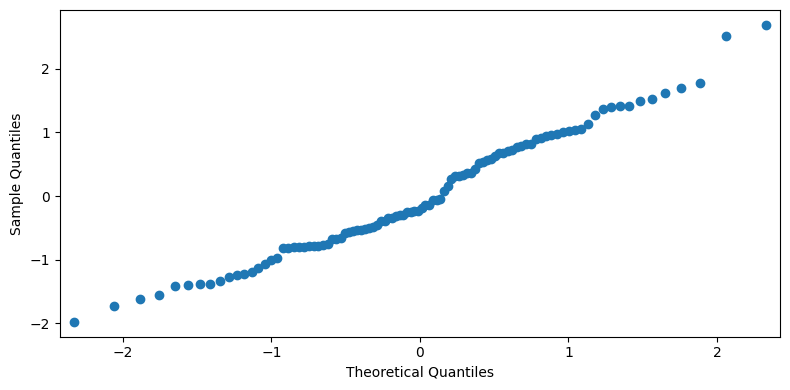

In [108]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

fig.tight_layout()
#fig.savefig("ch14-qqplot-model-2.pdf")

In [109]:
x = np.linspace(-1, 1, 50)

In [110]:
X1, X2 = np.meshgrid(x, x)

In [111]:
new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})

In [112]:
y_pred = result.predict(new_data)

In [113]:
y_pred.shape

(2500,)

In [114]:
y_pred = y_pred.values.reshape(50, 50)

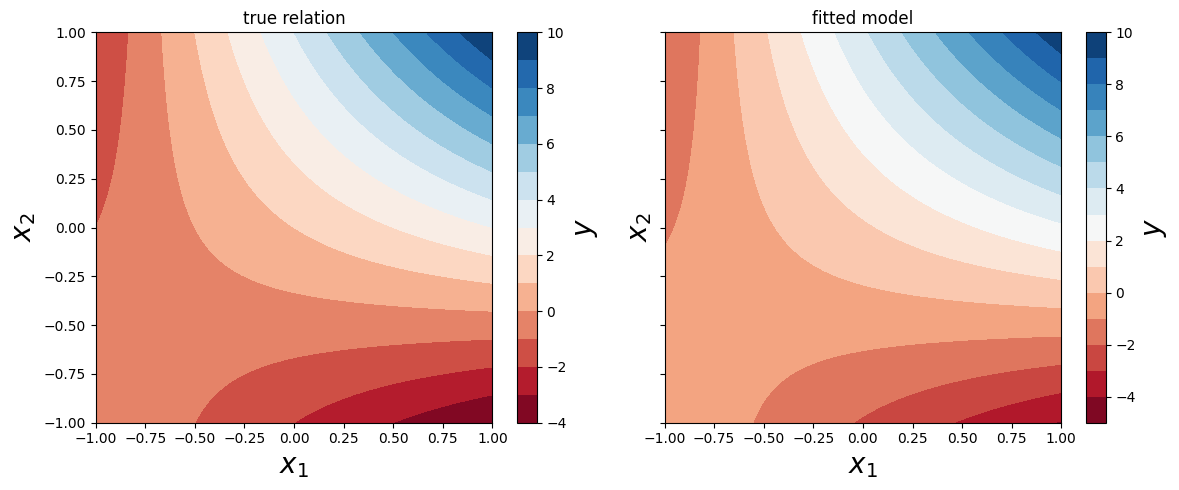

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

def plot_y_contour(ax, Y, title):
    c = ax.contourf(X1, X2, Y, 15, cmap=plt.cm.RdBu)
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20)
    ax.set_title(title)
    cb = fig.colorbar(c, ax=ax)
    cb.set_label(r"$y$", fontsize=20)

plot_y_contour(axes[0], y_true(X1, X2), "true relation")
plot_y_contour(axes[1], y_pred, "fitted model")

fig.tight_layout()
#fig.savefig("ch14-comparison-model-true.pdf")

# Взвешенная регрессия

In [116]:
from statsmodels.iolib.table import SimpleTable, default_txt_fmt

### Искусственные данные: 2 группы гетероскедастичности

Допущения модели:

 * Неточная спецификация: истинная модель квадратична, оценка только линейная
 * Независимый критерий шума/ошибки
 * Две группы для дисперсии ошибок, группы с низкой и высокой дисперсией

In [117]:
nsample = 50
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, (x - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, -0.01]
sig = 0.5
w = np.ones(nsample)
w[nsample * 6 // 10 :] = 3
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + sig * w * e
X = X[:, [0, 1]]

### WLS необходимо истинное значение дисперсии гетероскедастичности

В этом примере "w" - стандартное отклонение ошибки.  "WLS" требует, чтобы веса были пропорциональны величине, обратной дисперсии ошибки.

In [118]:
mod_wls = sm.WLS(y, X, weights=1.0 / (w ** 2))
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            WLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     619.9
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           4.27e-29
Time:                        20:18:08   Log-Likelihood:                -54.889
No. Observations:                  50   AIC:                             113.8
Df Residuals:                      48   BIC:                             117.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9370      0.154     32.114      0.0

## OLS vs. WLS

Оценим модель OLS для сравнения:

In [119]:
res_ols = sm.OLS(y, X).fit()
print(res_ols.params)
print(res_wls.params)

[4.99619295 0.4741614 ]
[4.93700361 0.48401074]


Сравните стандартные ошибки WLS со стандартными ошибками OLS с поправкой на гетероскедастичность:

In [120]:
se = np.vstack(
    [
        [res_wls.bse],
        [res_ols.bse],
        [res_ols.HC0_se],
        [res_ols.HC1_se],
        [res_ols.HC2_se],
        [res_ols.HC3_se],
    ]
)
se = np.round(se, 4)
colnames = ["x1", "const"]
rownames = ["WLS", "OLS", "OLS_HC0", "OLS_HC1", "OLS_HC3", "OLS_HC3"]
tabl = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)
print(tabl)

          x1   const 
---------------------
WLS     0.1537 0.0194
OLS     0.2435  0.021
OLS_HC0 0.1753  0.023
OLS_HC1 0.1789 0.0235
OLS_HC3   0.18 0.0236
OLS_HC3 0.1849 0.0243
---------------------


Вычислим интервалы предсказаний моделей:

In [121]:
covb = res_ols.cov_params()
prediction_var = res_ols.mse_resid + (X * np.dot(covb, X.T).T).sum(1)
prediction_std = np.sqrt(prediction_var)
tppf = stats.t.ppf(0.975, res_ols.df_resid)

In [122]:
pred_ols = res_ols.get_prediction()
iv_l_ols = pred_ols.summary_frame()["obs_ci_lower"]
iv_u_ols = pred_ols.summary_frame()["obs_ci_upper"]

Нарисуем график для сравнения прогнозируемых значений в WLS и OLS:

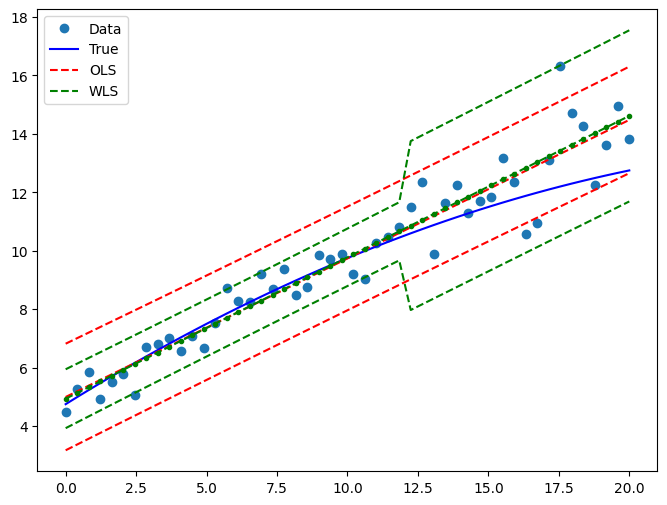

In [123]:
pred_wls = res_wls.get_prediction()
iv_l = pred_wls.summary_frame()["obs_ci_lower"]
iv_u = pred_wls.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, "o", label="Data")
ax.plot(x, y_true, "b-", label="True")
# OLS
ax.plot(x, res_ols.fittedvalues, "r--")
ax.plot(x, iv_u_ols, "r--", label="OLS")
ax.plot(x, iv_l_ols, "r--")
# WLS
ax.plot(x, res_wls.fittedvalues, "g--.")
ax.plot(x, iv_u, "g--", label="WLS")
ax.plot(x, iv_l, "g--")
ax.legend(loc="best")

### Задание 5.
Используя класс WLS реализовать алгоритм сглаживания с локальным гауссовским ядром. При этом в качестве ширины окна использовать половину длины вектора дисперсий независимых признаков. Применить этот способ сглаживания и сравнить его с результами WLS на данных этого раздела.

<ipython-input-124-f41df4b079f5>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = results.predict(x0.reshape(1, -1))


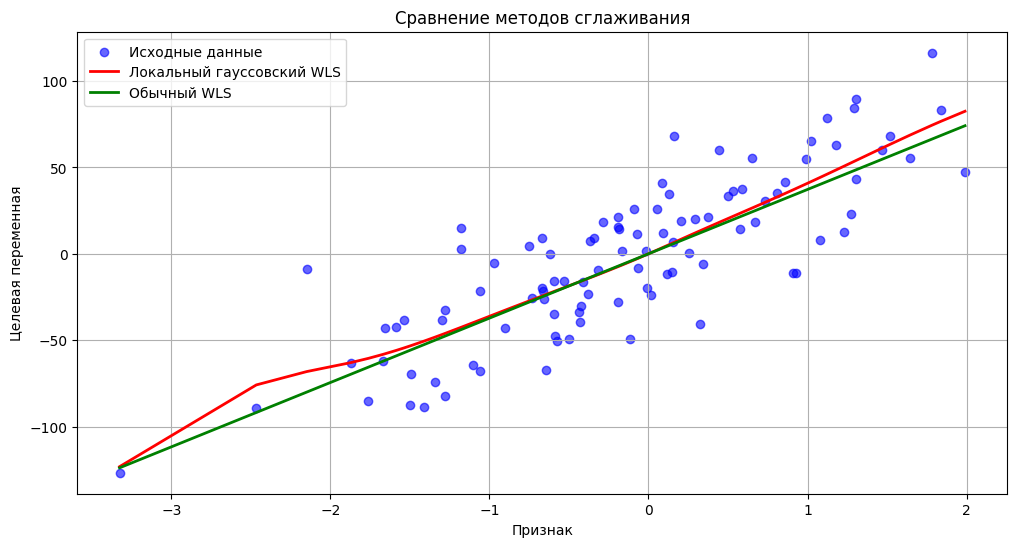

MSE локального гауссовского WLS: 651.09
MSE обычного WLS: 670.23


In [124]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import WLS
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

class LocalGaussianWLS:
    def __init__(self, bandwidth_scale=0.5):
        """
        Инициализация модели

        Parameters:
        bandwidth_scale (float): Масштабирующий коэффициент для ширины окна
                                (по умолчанию 0.5 - половина дисперсии)
        """
        self.bandwidth_scale = bandwidth_scale

    def fit_predict(self, X, y, X_pred=None):
        """
        Обучение модели и предсказание

        Parameters:
        X (ndarray): Матрица признаков формы (n_samples, n_features)
        y (ndarray): Вектор целевой переменной формы (n_samples,)
        X_pred (ndarray): Точки, в которых нужно сделать предсказание
                         (если None, используется X)

        Returns:
        ndarray: Предсказанные значения
        """
        if X_pred is None:
            X_pred = X

        # Вычисляем ширину окна как половину длины вектора дисперсий признаков
        bandwidth = self.bandwidth_scale * np.sqrt(np.sum(np.var(X, axis=0)))

        y_pred = np.zeros(X_pred.shape[0])

        for i, x0 in enumerate(X_pred):
            # Вычисляем веса Гауссовского ядра
            distances = np.sum((X - x0)**2, axis=1)
            weights = np.exp(-distances / (2 * bandwidth**2))

            # Применяем взвешенный метод наименьших квадратов
            model = WLS(y, X, weights=weights)
            results = model.fit()

            # Предсказание для текущей точки
            y_pred[i] = results.predict(x0.reshape(1, -1))

        return y_pred

# Генерация тестовых данных
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X = X + np.random.normal(0, 0.5, size=X.shape)  # Добавляем немного шума к X

# Сортировка для визуализации
sort_idx = np.argsort(X[:, 0])
X = X[sort_idx]
y = y[sort_idx]

# Применение локального гауссовского WLS
lgwls = LocalGaussianWLS(bandwidth_scale=0.5)
y_lgwls = lgwls.fit_predict(X, y)

# Применение обычного WLS (с единичными весами)
wls = WLS(y, X).fit()
y_wls = wls.predict(X)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Исходные данные', alpha=0.6)
plt.plot(X, y_lgwls, color='red', label='Локальный гауссовский WLS', linewidth=2)
plt.plot(X, y_wls, color='green', label='Обычный WLS', linewidth=2)
plt.title('Сравнение методов сглаживания')
plt.xlabel('Признак')
plt.ylabel('Целевая переменная')
plt.legend()
plt.grid(True)
plt.show()

# Сравнение MSE
mse_lgwls = mean_squared_error(y, y_lgwls)
mse_wls = mean_squared_error(y, y_wls)

print(f"MSE локального гауссовского WLS: {mse_lgwls:.2f}")
print(f"MSE обычного WLS: {mse_wls:.2f}")

## Допустимый взвешенный метод наименьших квадратов (2-ступенчатый FWLS)

Как и `w`, `w_est` пропорционален стандартному отклонению и поэтому должен быть возведен в квадрат.

# Сглаживатель LOWESS

В этом ноутбуке представлен сглаживатель LOWESS в "непараметрическом" пакете. LOWESS выполняет взвешенные локальные линейные подгонки.

Мы сгенерировали некоторые нелинейные данные и выполнили подгонку по LOWESS, затем вычислили 95% доверительный интервал для подгонки по LOWESS, выполнив повторную выборку bootstrap.

In [126]:
import pylab

sns.set_style("darkgrid")
pylab.rc("figure", figsize=(16, 8))
pylab.rc("font", size=14)

In [127]:
np.random.seed(1)

In [128]:
# Смоделируем данные похожие на cos
x = np.random.uniform(0, 4 * np.pi, size=200)
y = np.cos(x) + np.random.random(size=len(x))

# Вычислите наименьшее сглаживание данных
smoothed = sm.nonparametric.lowess(exog=x, endog=y, frac=0.2)

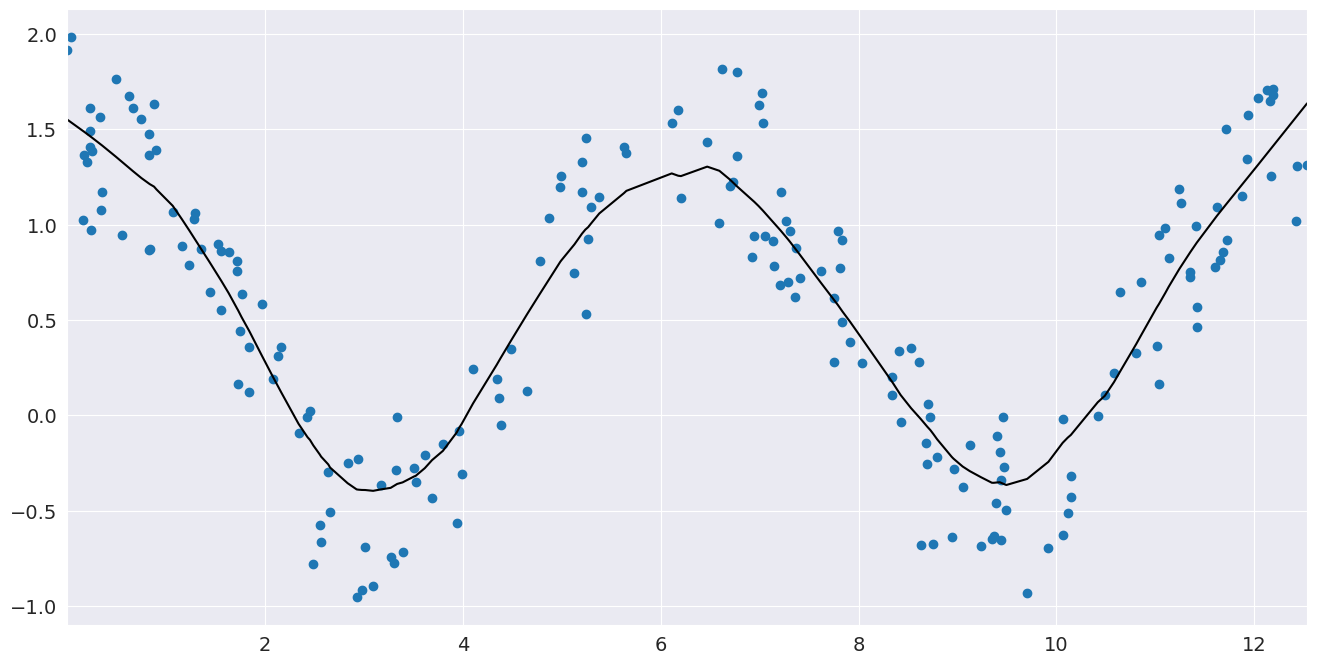

In [129]:
# Построим сглаживающую кривую
fig, ax = pylab.subplots()

ax.scatter(x, y)
ax.plot(smoothed[:, 0], smoothed[:, 1], c="k")
pylab.autoscale(enable=True, axis="x", tight=True)

## Доверительный интервал

Теперь, когда мы выполнили подгонку, мы, возможно, захотим узнать, насколько она точна. Повторная выборка Bootstrap дает один из способов оценки доверительных интервалов для подгонки LOWESS путем вычисления подгонки LOWESS для большого количества случайных повторных выборок из наших данных.

In [130]:
# Теперь создайте доверительный интервал начальной загрузки вокруг подгонки a LOWESS

def lowess_with_confidence_bounds(
    x, y, eval_x, N=200, conf_interval=0.95, lowess_kw=None
):
    """
    Выполняет регрессию по LOWESS и определите доверительный интервал путем повторной выборки bootstrap
    """
    # Lowess сглаживание
    smoothed = sm.nonparametric.lowess(exog=x, endog=y, xvals=eval_x, **lowess_kw)

    # Выполним повторную выборку данных при начальной загрузке
    # и оцените сглаживание в фиксированном наборе точек
    smoothed_values = np.empty((N, len(eval_x)))
    for i in range(N):
        sample = np.random.choice(len(x), len(x), replace=True)
        sampled_x = x[sample]
        sampled_y = y[sample]

        smoothed_values[i] = sm.nonparametric.lowess(
            exog=sampled_x, endog=sampled_y, xvals=eval_x, **lowess_kw
        )

    # Получите доверительный интервал
    sorted_values = np.sort(smoothed_values, axis=0)
    bound = int(N * (1 - conf_interval) / 2)
    bottom = sorted_values[bound - 1]
    top = sorted_values[-bound]

    return smoothed, bottom, top


# Вычислим 95% доверительный интервал
eval_x = np.linspace(0, 4 * np.pi, 31)
smoothed, bottom, top = lowess_with_confidence_bounds(
    x, y, eval_x, lowess_kw={"frac": 0.1}
)

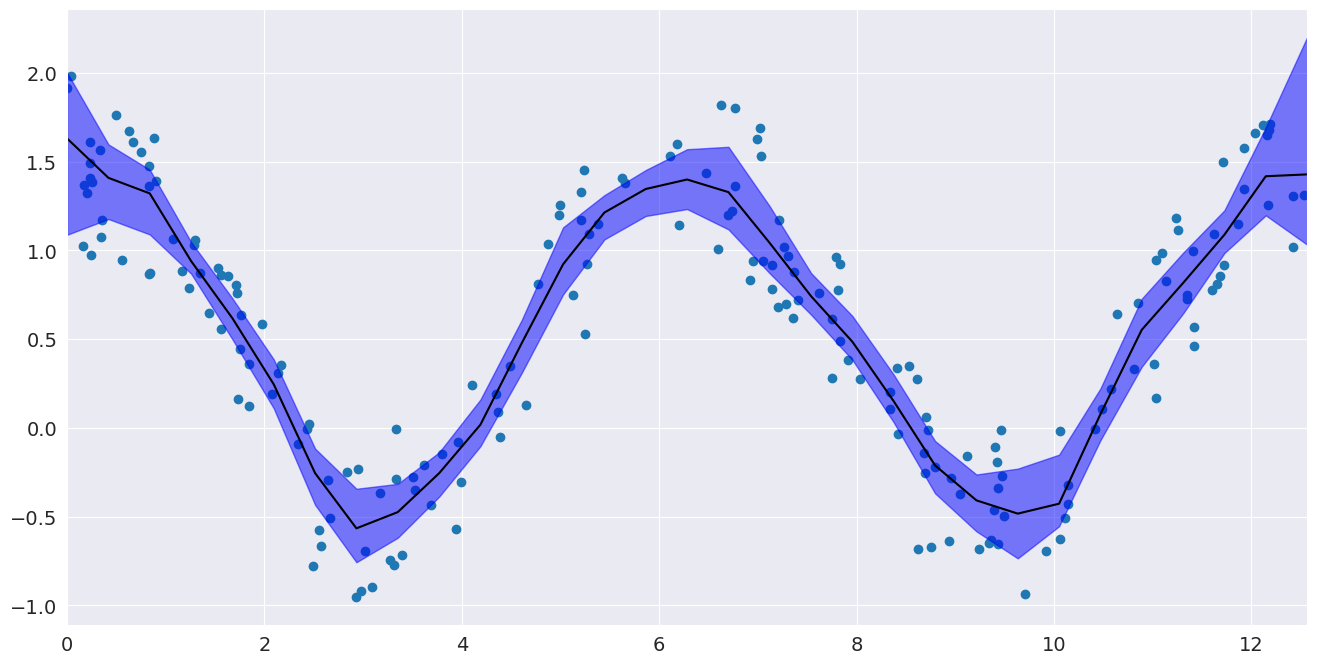

In [131]:
# Постройте доверительный интервал и результат
fig, ax = pylab.subplots()
ax.scatter(x, y)
ax.plot(eval_x, smoothed, c="k")
ax.fill_between(eval_x, bottom, top, alpha=0.5, color="b")
pylab.autoscale(enable=True, axis="x", tight=True)

### Задание 6
Потроить зависимость среднего, максимального и минимального значений доверительного интервала для алгоритма LOWLESS на наборе данных этого раздела от амплитуды шума. Амплитуду шума изменять в диапазоне np.logspace(0.01,5).

100%|██████████| 30/30 [00:23<00:00,  1.30it/s]


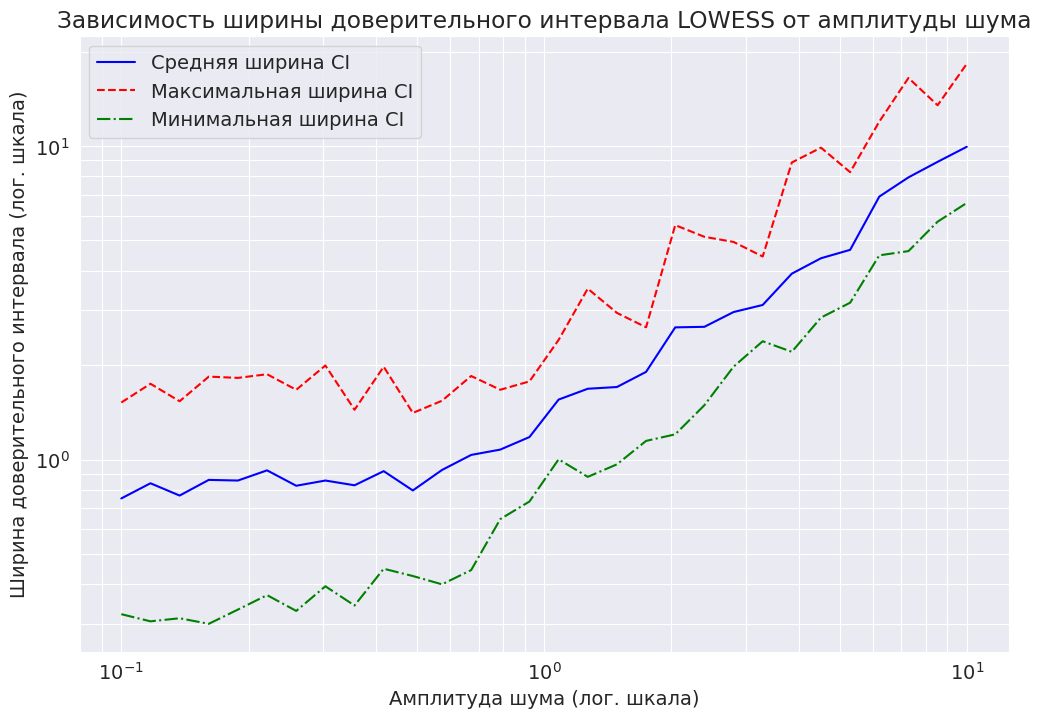

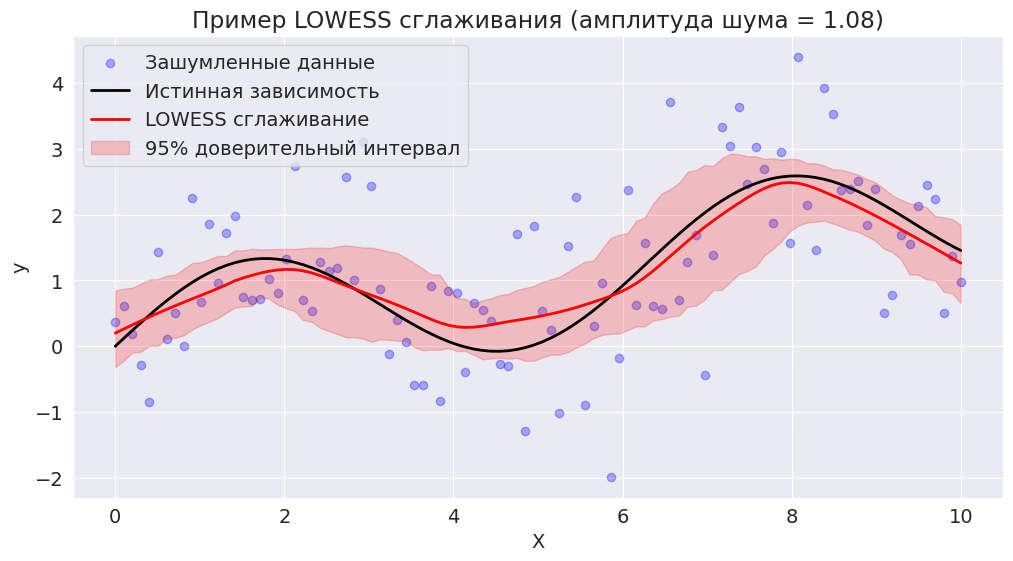

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from tqdm import tqdm

# Генерация базовых данных без шума
np.random.seed(42)
X = np.linspace(0, 10, 100)
y_true = np.sin(X) + X/5

# Диапазон амплитуд шума
noise_amplitudes = np.logspace(-1, 1, 30)  # Изменяем диапазон для лучшей визуализации

# Массивы для хранения результатов
mean_ci_widths = []
max_ci_widths = []
min_ci_widths = []

def bootstrap_ci(X, y, frac=0.3, n_bootstrap=100, alpha=0.05):
    """Вычисляет доверительный интервал с помощью бутстрепа"""
    bootstrap_results = []

    for _ in range(n_bootstrap):
        # Генерируем бутстреп-выборку
        indices = np.random.choice(len(X), size=len(X), replace=True)
        X_bs = X[indices]
        y_bs = y[indices]

        # Применяем LOWESS
        smoothed = lowess(y_bs, X_bs, frac=frac, it=3)
        bootstrap_results.append(smoothed[:, 1])

    # Вычисляем квантили
    bootstrap_results = np.array(bootstrap_results)
    lower = np.percentile(bootstrap_results, 100*alpha/2, axis=0)
    upper = np.percentile(bootstrap_results, 100*(1-alpha/2), axis=0)

    return lower, upper

for amplitude in tqdm(noise_amplitudes):
    # Добавляем шум с текущей амплитудой
    y_noisy = y_true + np.random.normal(0, amplitude, size=X.shape)

    # Применяем LOWESS и вычисляем доверительный интервал
    y_smoothed = lowess(y_noisy, X, frac=0.3, it=3)[:, 1]
    lower, upper = bootstrap_ci(X, y_noisy)

    # Вычисляем ширину доверительного интервала
    ci_width = upper - lower

    # Сохраняем статистики
    mean_ci_widths.append(np.mean(ci_width))
    max_ci_widths.append(np.max(ci_width))
    min_ci_widths.append(np.min(ci_width))

# Построение графиков
plt.figure(figsize=(12, 8))

# График зависимости ширины CI от амплитуды шума
plt.loglog(noise_amplitudes, mean_ci_widths, 'b-', label='Средняя ширина CI')
plt.loglog(noise_amplitudes, max_ci_widths, 'r--', label='Максимальная ширина CI')
plt.loglog(noise_amplitudes, min_ci_widths, 'g-.', label='Минимальная ширина CI')

plt.title('Зависимость ширины доверительного интервала LOWESS от амплитуды шума')
plt.xlabel('Амплитуда шума (лог. шкала)')
plt.ylabel('Ширина доверительного интервала (лог. шкала)')
plt.legend()
plt.grid(True, which="both", ls="-")

# Дополнительный график с примером данных и сглаживания для одной амплитуды
example_amplitude = noise_amplitudes[15]
y_example = y_true + np.random.normal(0, example_amplitude, size=X.shape)
y_smoothed_ex = lowess(y_example, X, frac=0.3, it=3)[:, 1]
lower_ex, upper_ex = bootstrap_ci(X, y_example)

plt.figure(figsize=(12, 6))
plt.scatter(X, y_example, color='blue', alpha=0.3, label='Зашумленные данные')
plt.plot(X, y_true, 'k-', linewidth=2, label='Истинная зависимость')
plt.plot(X, y_smoothed_ex, 'r-', linewidth=2, label='LOWESS сглаживание')
plt.fill_between(X, lower_ex, upper_ex, color='red', alpha=0.2, label='95% доверительный интервал')
plt.title(f'Пример LOWESS сглаживания (амплитуда шума = {example_amplitude:.2f})')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.show()